In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation ,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy,mean_squared_error,R2Score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline 


In [2]:
test=pd.read_csv('test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [3]:
df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
all_dropped=[]


In [5]:
def get_cols_with_many_nans(df,identifier,percentage=0.2):

    result=[]
    total_rows=df[identifier].count()
    thershold=int(total_rows*percentage)
    for col in df.columns :
        if df[col].isna().sum() > thershold:
            result.append(col)
    return result



In [6]:
cols_with_many_nans=get_cols_with_many_nans(df,'Id')
cols_with_many_nans

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
all_dropped +=cols_with_many_nans
all_dropped

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
print('list of columns with alot of missing values\n ')
print('Columns | missing % \n')
for col in cols_with_many_nans:
    print(f"{col} | {((df[col].isna().sum() / df['SalePrice'].count())*100):2f}%")



list of columns with alot of missing values
 
Columns | missing % 

Alley | 93.767123%
MasVnrType | 59.726027%
FireplaceQu | 47.260274%
PoolQC | 99.520548%
Fence | 80.753425%
MiscFeature | 96.301370%


Drop columns with alot of missing values 

In [8]:
df.drop(cols_with_many_nans ,axis=1,inplace=True)

In [9]:
test.drop(cols_with_many_nans ,axis=1,inplace=True)

In [10]:
print(df.shape,test.shape)
      

(1460, 75) (1459, 74)


In [13]:
categorical_cols=[]
numeric_cols=[]
for col in df.columns:
    if df[col].dtype.name == 'object':
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)
print(len(categorical_cols),len(numeric_cols))


37 38


In [11]:
def fillna_missin_values(df,col):
    if df[col].dtype.name=='object':
        mode=df[col].mode
        df[col].fillna(mode,inplace=True)
    else :
        mean=df[col].mean()
        df[col].fillna(mean,inplace=True)


In [12]:
test_cols=[]
for col in test.columns:
  if test[col].isna().sum():
    test_cols.append(col)
    
df_cols=[]
for col in df.columns :
  if df[col].isna().sum():
    df_cols.append(col) 
   
test_cols


['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [13]:
for col in test_cols:
    fillna_missin_values(test,col)

for col in df_cols:
    fillna_missin_values(df,col)

print(df.shape)
print(test.shape)

(1460, 75)
(1459, 74)


In [14]:
has_nulls = df.isnull().values.any()
print("Are there any null values in the DataFrame?")
print(has_nulls)



Are there any null values in the DataFrame?
False


In [15]:
has_nulls = test.isnull().values.any()
print("Are there any null values in the test DataFrame?")
print(has_nulls)

Are there any null values in the test DataFrame?
False


## Drop columns that have extremly high skew if exists

Skew means that many of the values in that column took on one specific value 
columns like that were not very predictive so we wanna these columns be dropped 

In [16]:
def get_cols_with_high_skew(df,percentage=0.85):
    skewed_cols=[]
    for col in df.columns:
       hieghest_count_category=df[col].value_counts().max()
       total_count=df[col].count()
       skew=hieghest_count_category/total_count
       if skew >percentage:
            skewed_cols.append(col)
    return skewed_cols




In [17]:
cols_with_high_skew=get_cols_with_high_skew(df)
cols_with_high_skew

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType']

In [18]:
print('columns with high skew\n')
print('column | Skew% \n')
for col in cols_with_high_skew:
    print(f"{col} | {(df[col].value_counts().max() / df[col].count()) * 100}%")


columns with high skew

column | Skew% 

Street | 99.58904109589041%
LandContour | 89.7945205479452%
Utilities | 99.93150684931507%
LandSlope | 94.65753424657535%
Condition1 | 86.3013698630137%
Condition2 | 98.97260273972603%
RoofMatl | 98.21917808219179%
ExterCond | 87.8082191780822%
BsmtCond | 89.7945205479452%
BsmtFinType2 | 86.02739726027397%
BsmtFinSF2 | 88.56164383561645%
Heating | 97.80821917808218%
CentralAir | 93.4931506849315%
Electrical | 91.36986301369862%
LowQualFinSF | 98.21917808219179%
BsmtHalfBath | 94.3835616438356%
KitchenAbvGr | 95.34246575342465%
Functional | 93.15068493150685%
GarageQual | 89.7945205479452%
GarageCond | 90.82191780821918%
PavedDrive | 91.78082191780823%
EnclosedPorch | 85.75342465753425%
3SsnPorch | 98.35616438356163%
ScreenPorch | 92.05479452054794%
PoolArea | 99.52054794520548%
MiscVal | 96.43835616438356%
SaleType | 86.78082191780821%


Now we will Drop them

In [19]:
df.drop(cols_with_high_skew,axis=1,inplace=True)


In [20]:
test.drop(cols_with_high_skew,axis=1,inplace=True)

In [21]:
print(df.shape,test.shape)

(1460, 48) (1459, 47)


## find correlated columns and drop the redundent  columns 

<Axes: >

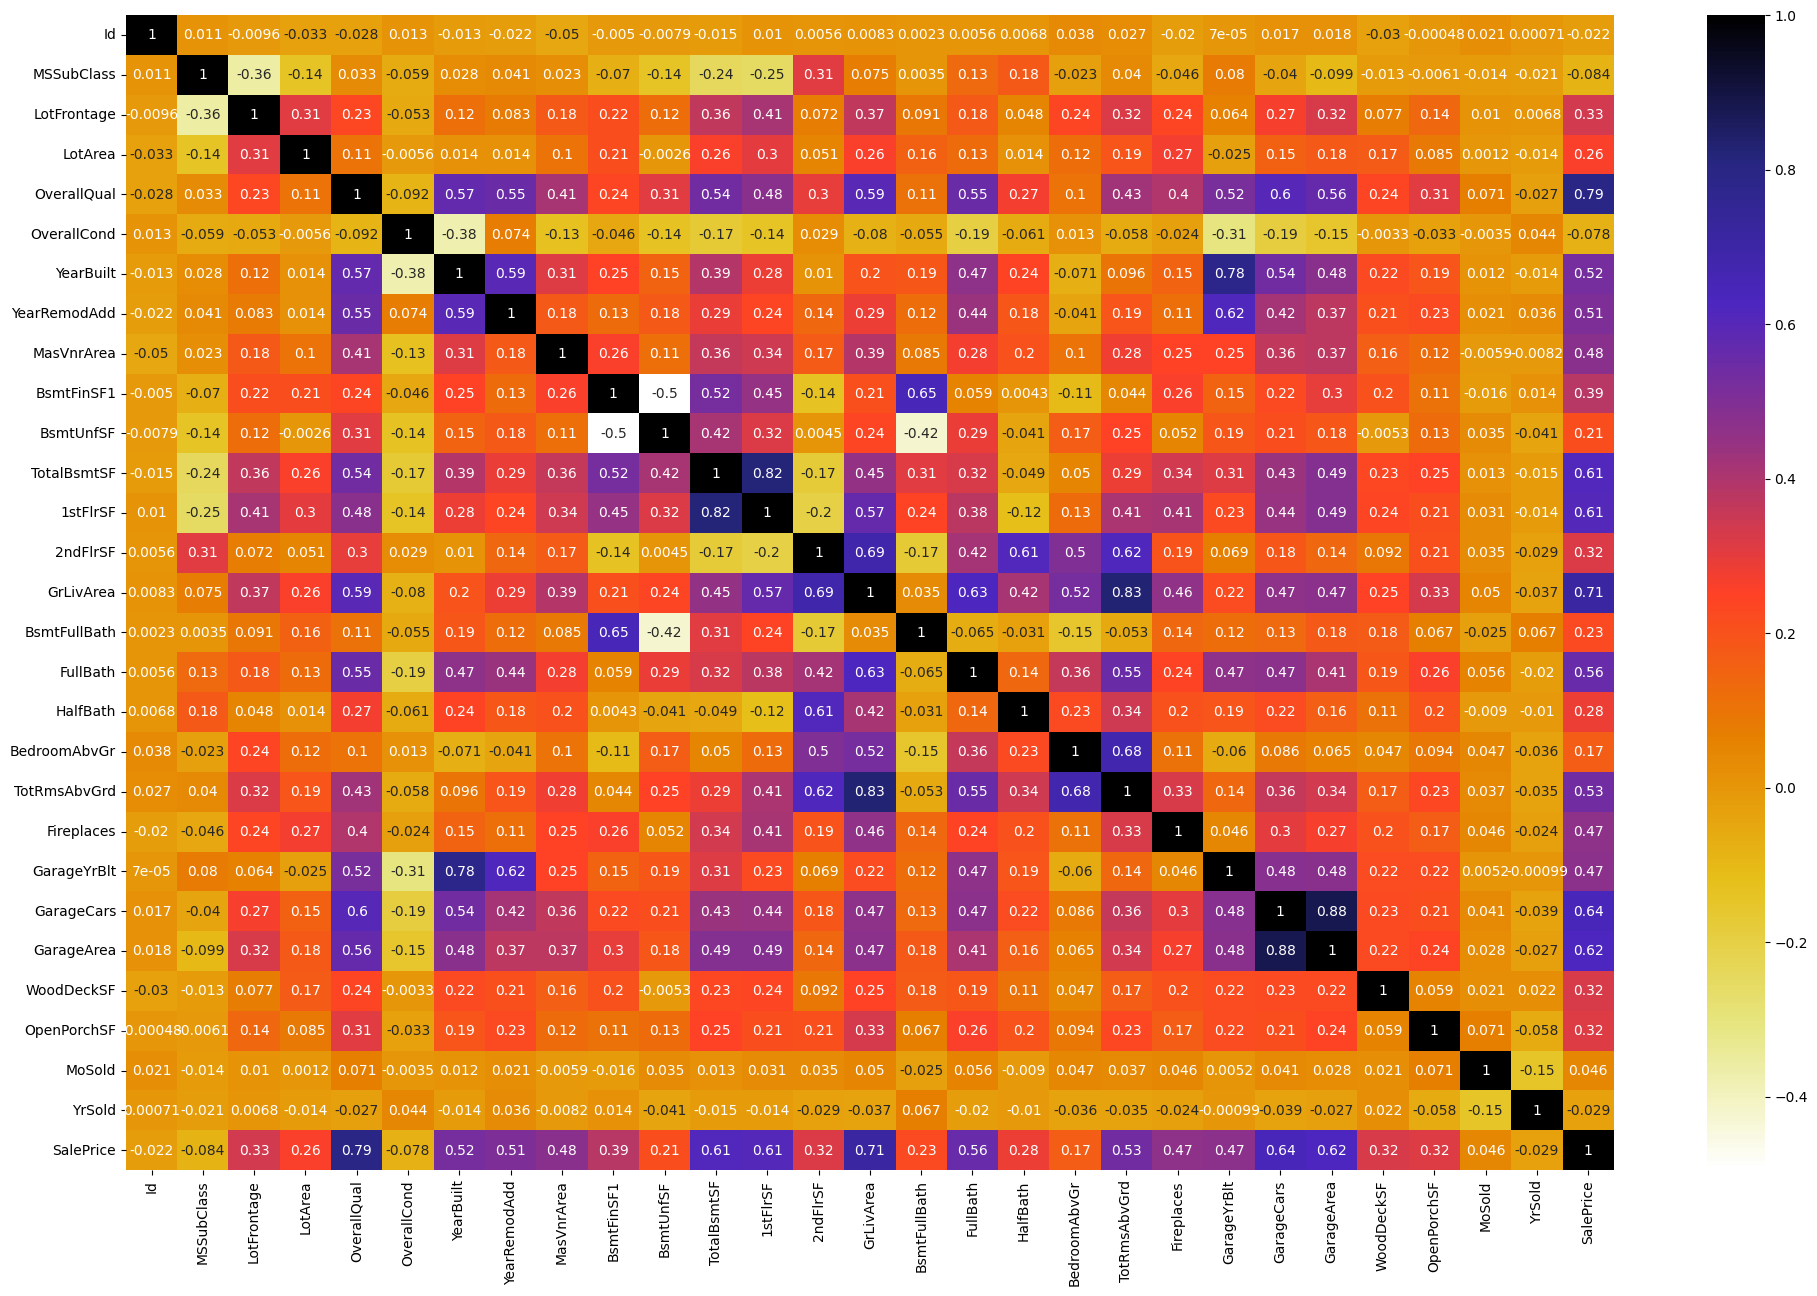

In [22]:
#using Pearson correlation
plt.figure(figsize=(24,15))
cor=df.corr(numeric_only=True)
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)


In [24]:
def get_correlated_cols(dataset,threshold):
    corr_cols=set() # set of all names of correllated features
    corr_matrix=dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name=corr_matrix.columns[i]
                corr_cols.add(col_name)
    return corr_cols 



In [25]:
train=df.drop(['SalePrice'],axis=1)


In [26]:
corr_features=get_correlated_cols(train,0.6)
corr_features

{'1stFlrSF',
 'BsmtFullBath',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'TotRmsAbvGrd'}

In [27]:
df.drop(corr_features,axis=1,inplace=True)

In [28]:
test.drop(corr_features,axis=1,inplace=True)

In [29]:
df.shape ,test.shape

((1460, 39), (1459, 38))

In [30]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,567.240411,1057.429452,346.992466,2.866438,0.613014,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,441.866955,438.705324,436.528436,0.815778,0.644666,125.338794,66.256028,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,0.000000,3.000000,1.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,728.000000,3.000000,1.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,2065.000000,8.000000,3.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [31]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.000000      861
103.685262      8
72.000000       8
108.000000      8
180.000000      8
             ... 
562.000000      1
89.000000       1
921.000000      1
762.000000      1
119.000000      1
Name: count, Length: 328, dtype: int64

<Axes: xlabel='MasVnrArea', ylabel='Count'>

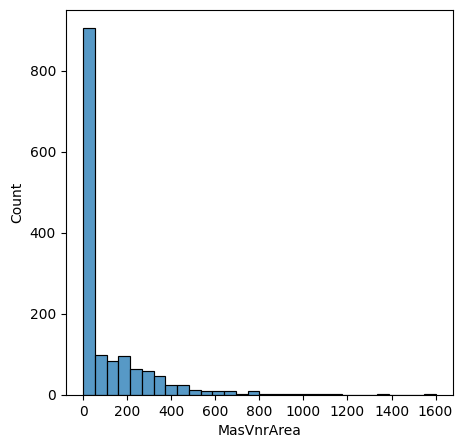

In [32]:
plt.figure(figsize=(5,5))
sns.histplot(df.MasVnrArea,bins=30)

<Axes: xlabel='log_MasVnrArea', ylabel='Count'>

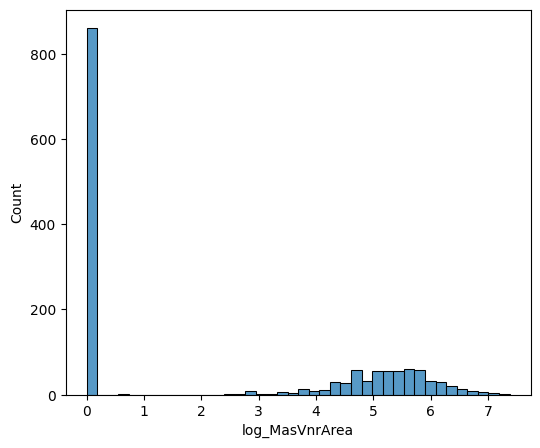

In [33]:
df['log_MasVnrArea']=np.log1p(df.MasVnrArea)
plt.figure(figsize=(6,5))
sns.histplot(df.log_MasVnrArea,bins=40)

In [34]:
df.drop(['MasVnrArea','log_MasVnrArea'],axis=1,inplace=True)


In [35]:
test.drop(['MasVnrArea'],axis=1,inplace=True)

In [36]:
df.shape, test.shape

((1460, 38), (1459, 37))

## finding oultiers if exisits

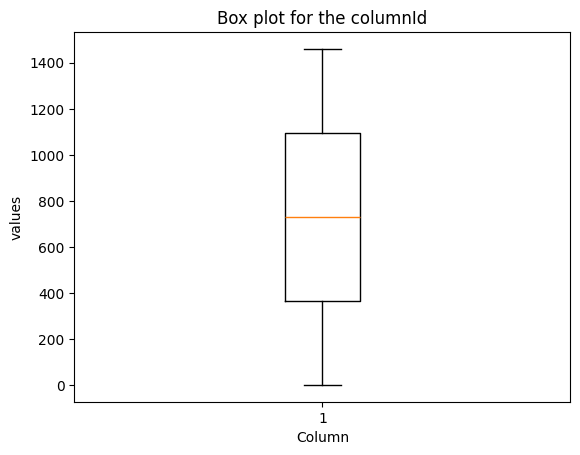

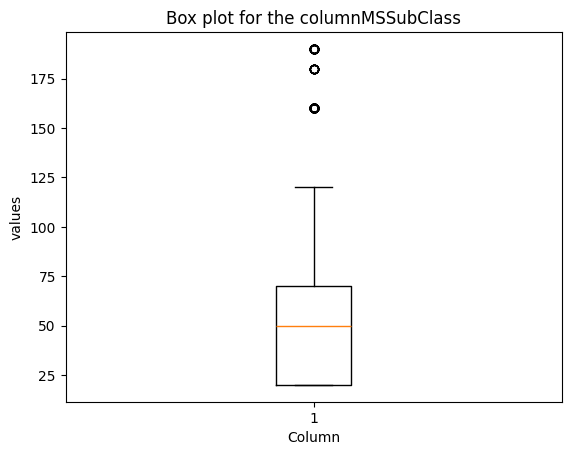

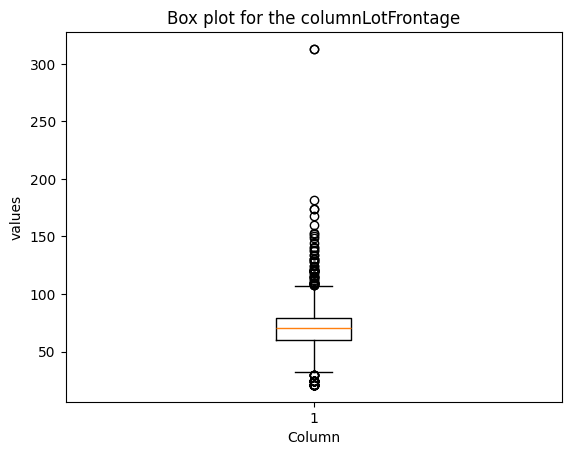

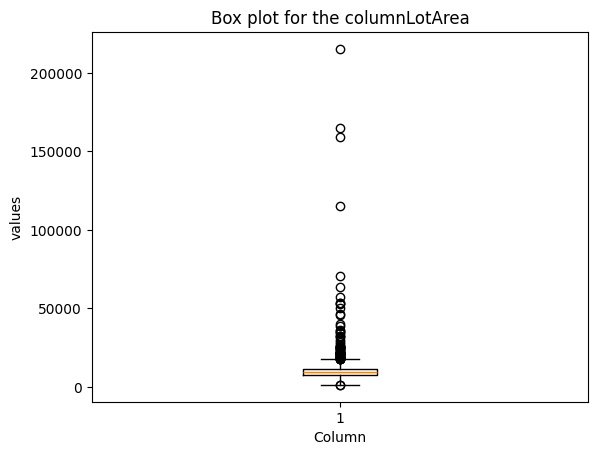

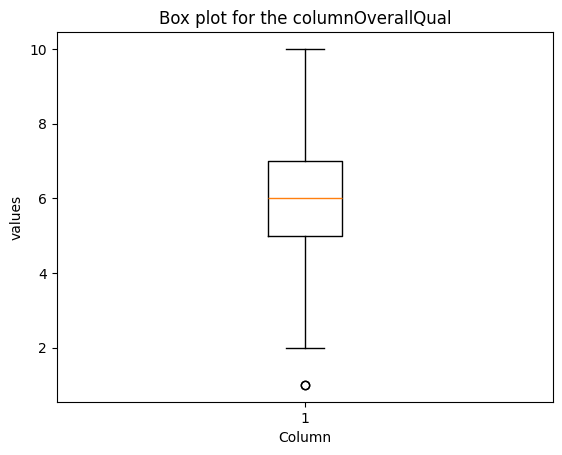

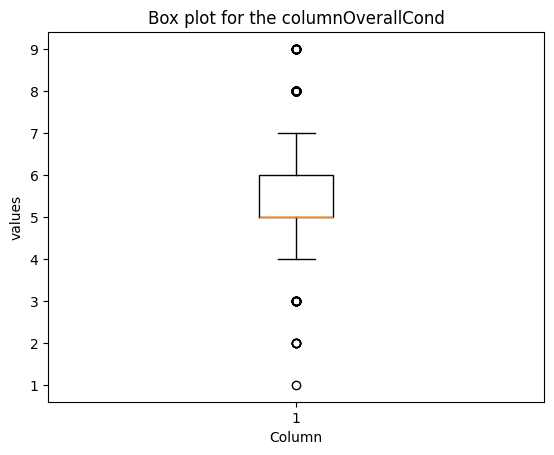

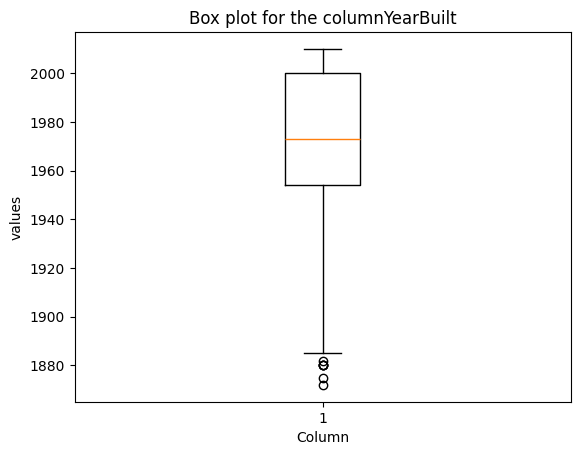

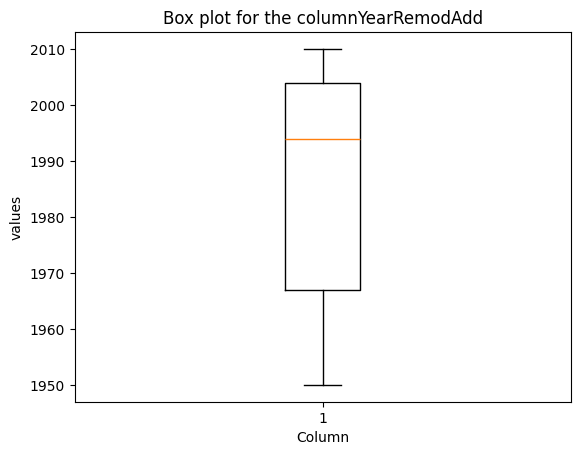

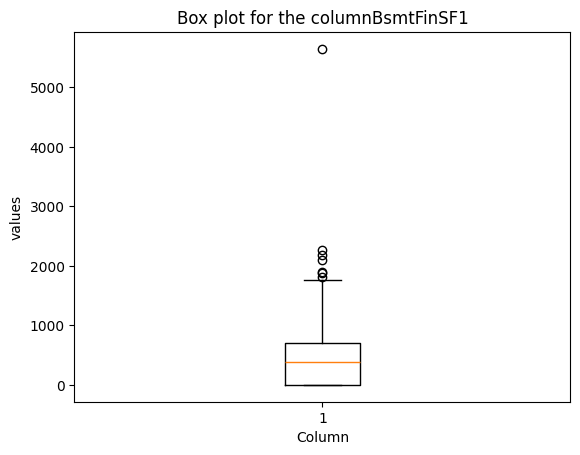

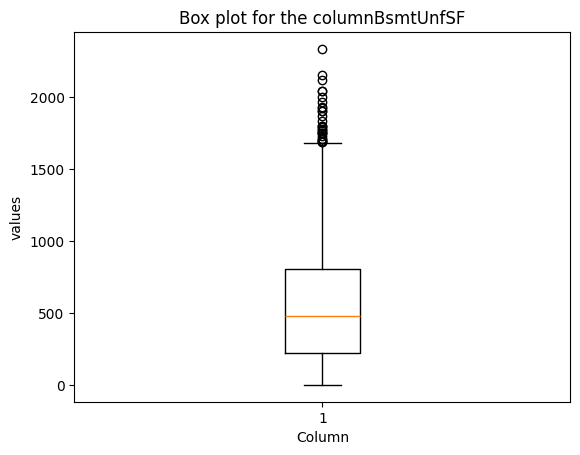

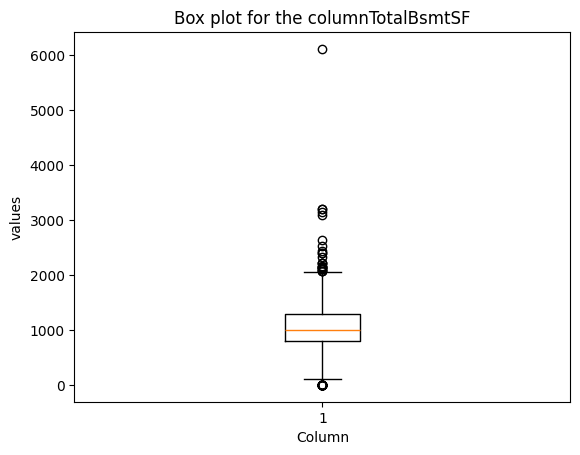

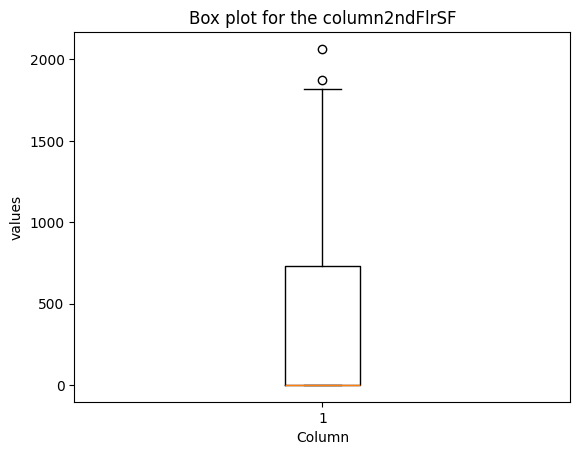

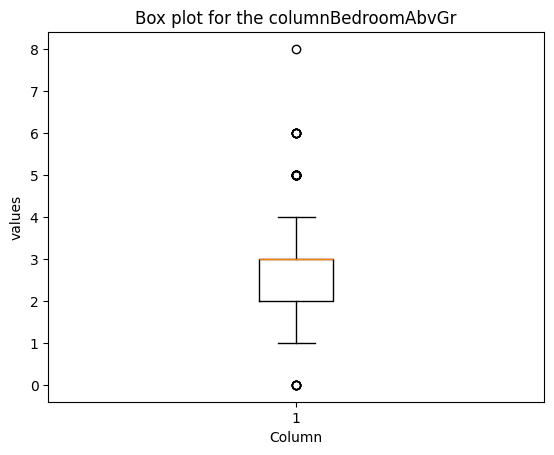

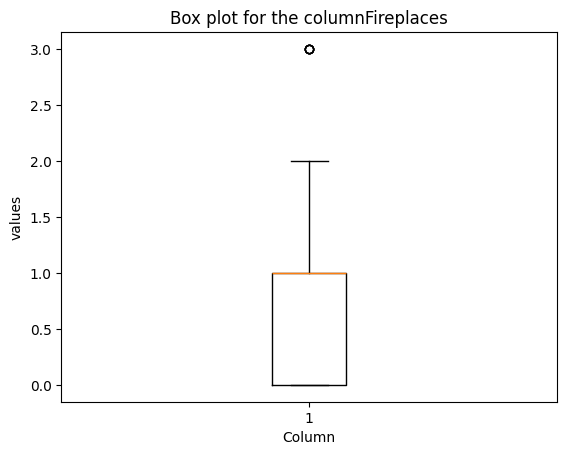

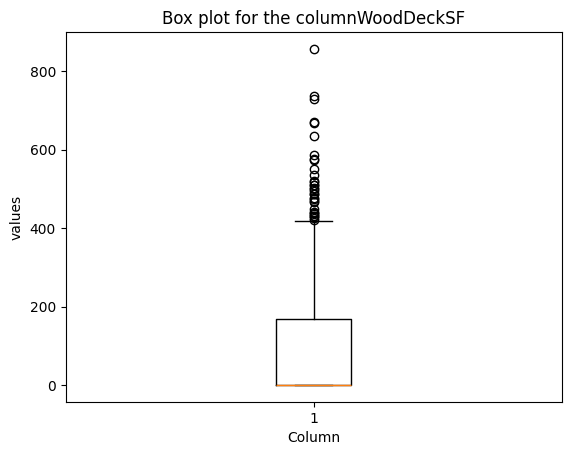

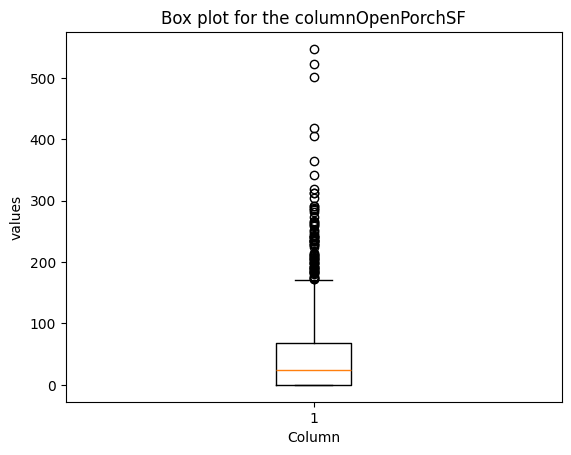

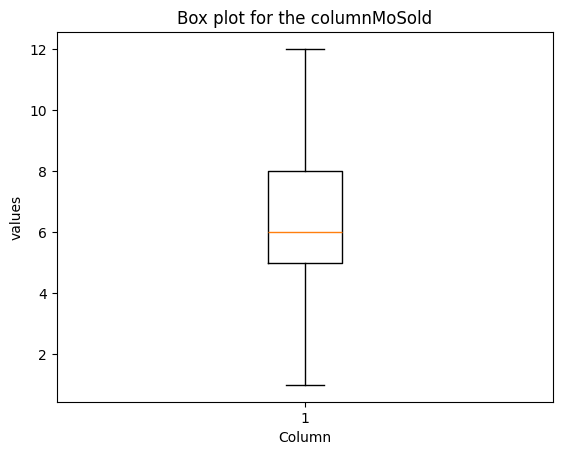

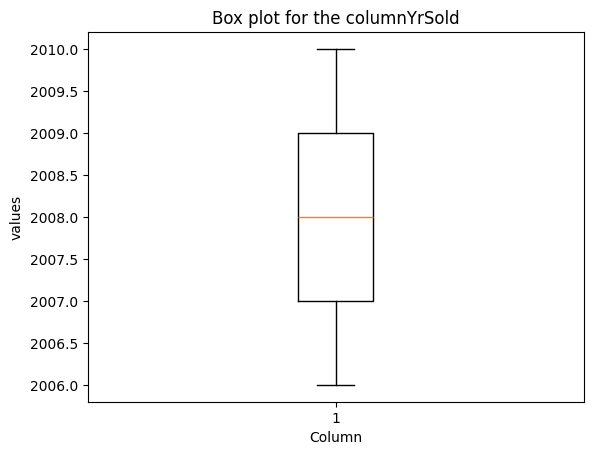

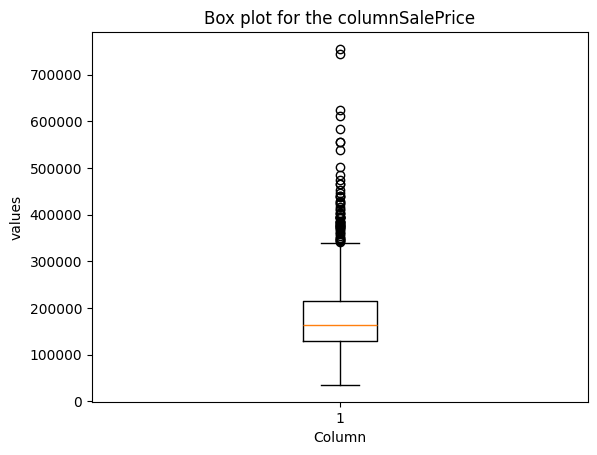

In [37]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Box plot for the column{col}")
    plt.xlabel('Column')
    plt.ylabel('values')
    plt.show()
    



In [38]:
def remove_oultiers_from_cols(df):
    for col in df.select_dtypes(include='number').columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1 - 1.5 * iqr
        upper_bound=q3 + 1.5 * iqr
        df[col]=df[col].apply(lambda x :lower_bound if x<lower_bound else upper_bound if x > upper_bound else x)
    return df 


In [39]:
df=remove_oultiers_from_cols(df)

## lets see if we romved the outliers 

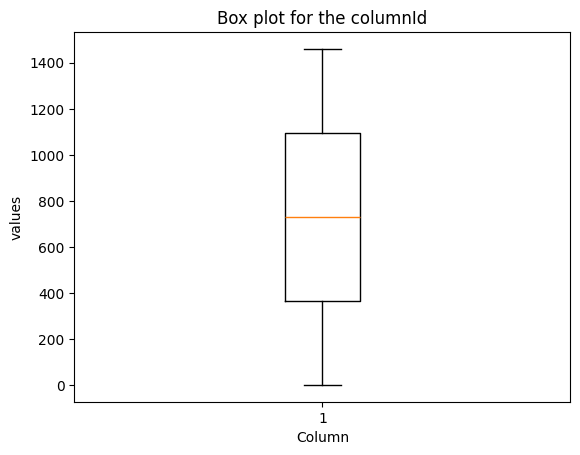

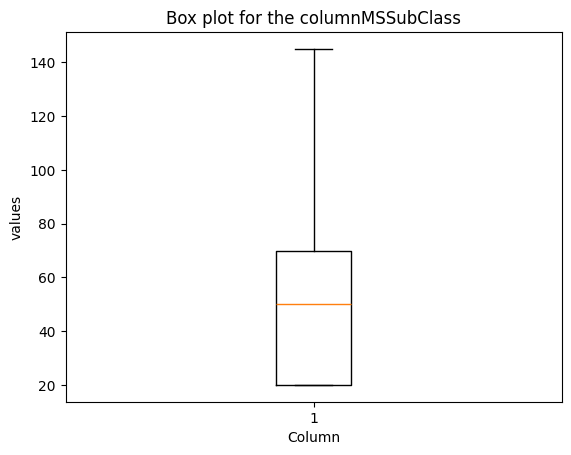

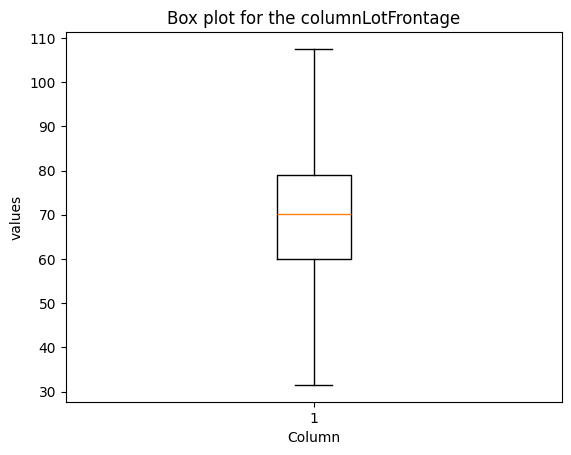

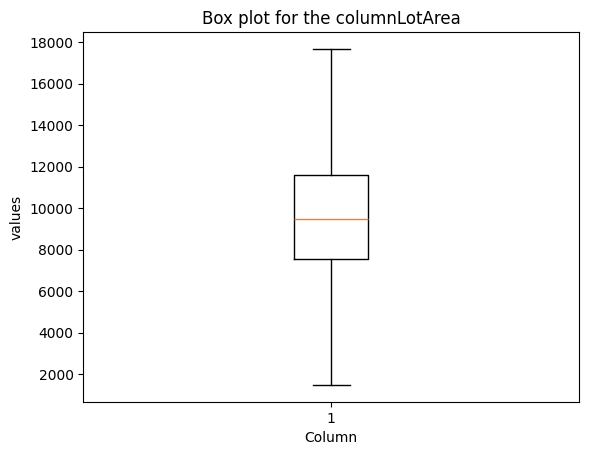

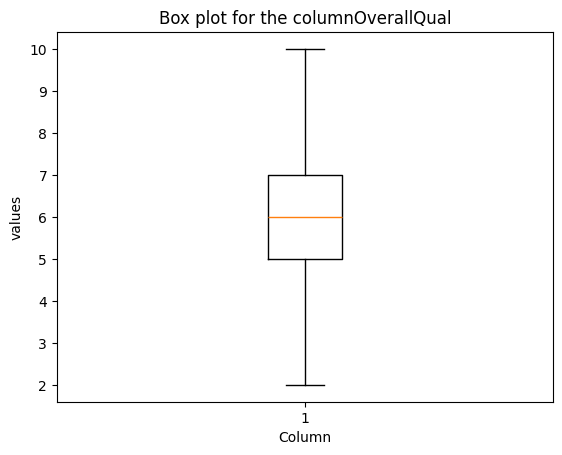

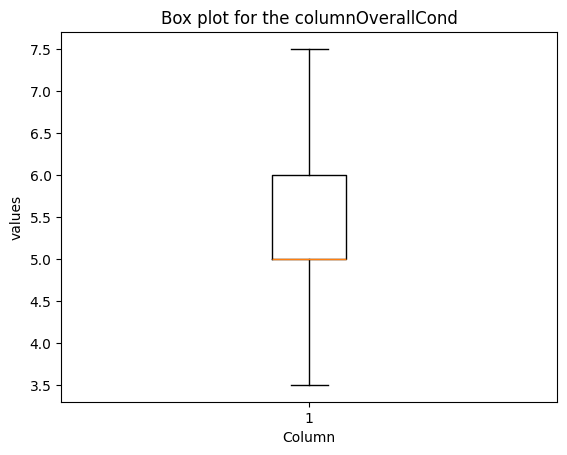

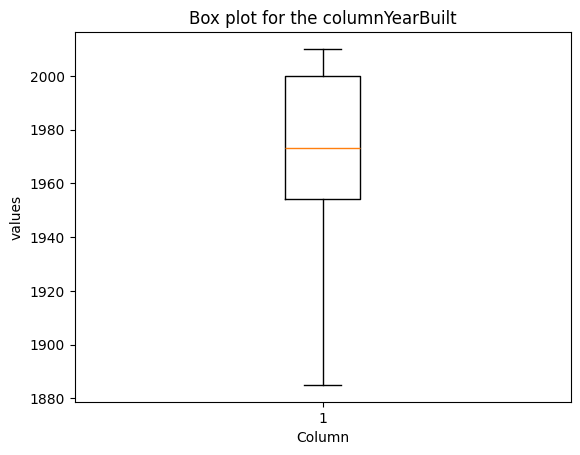

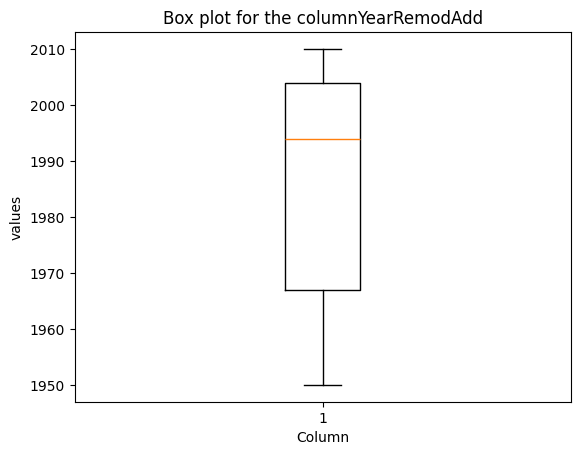

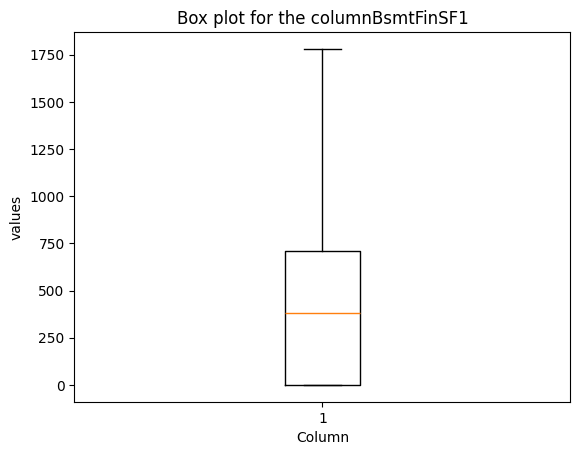

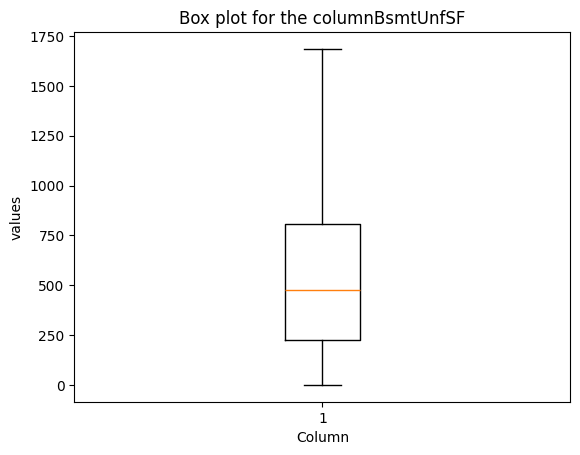

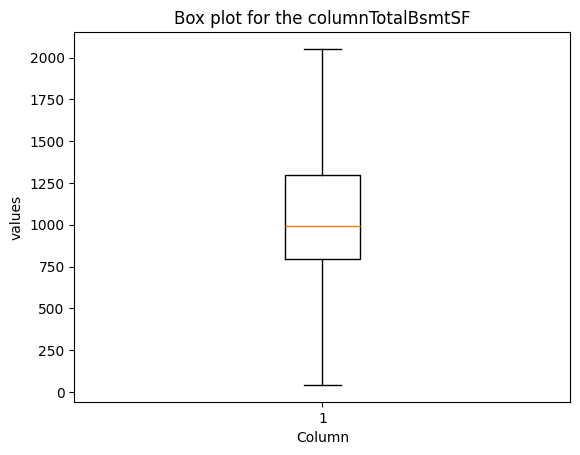

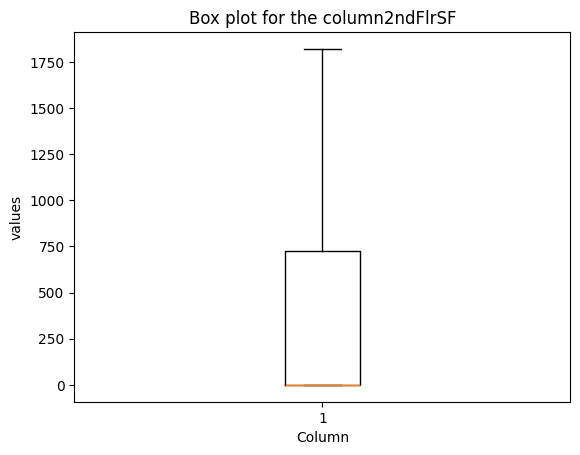

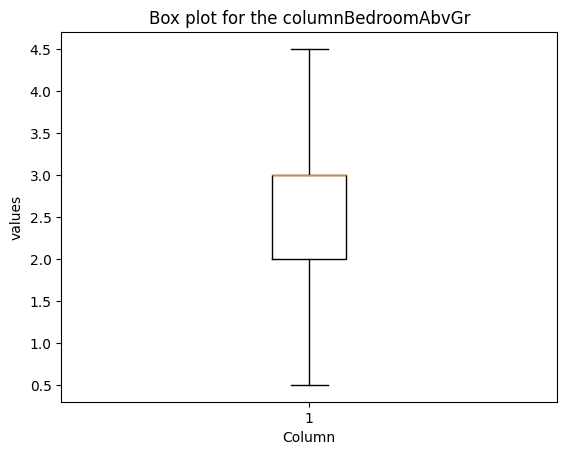

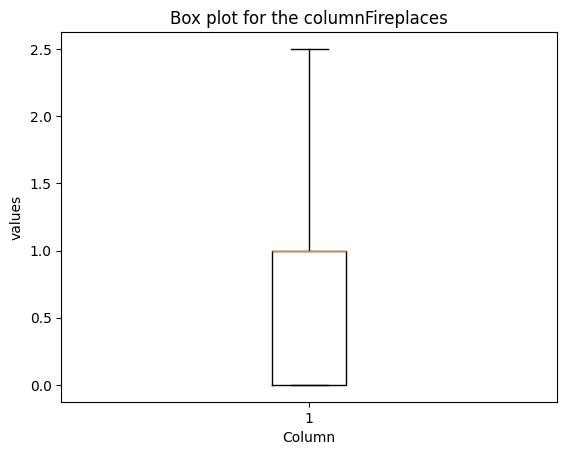

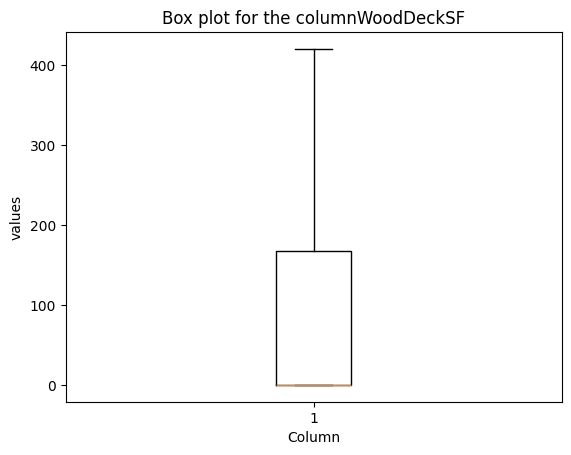

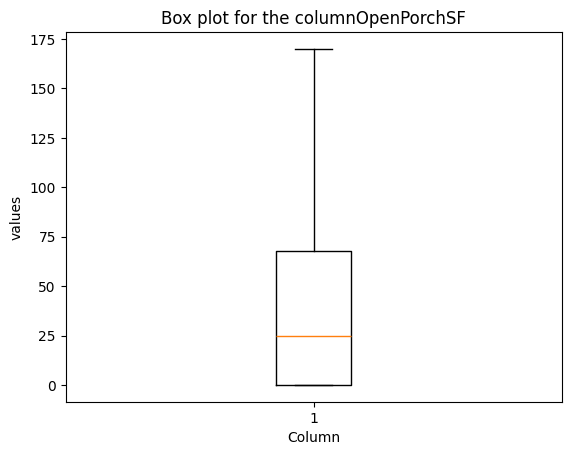

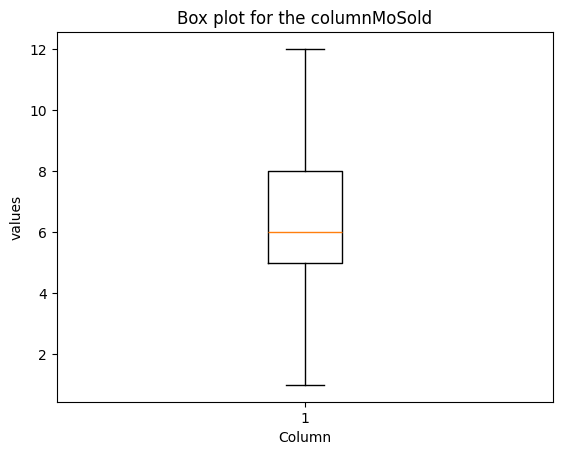

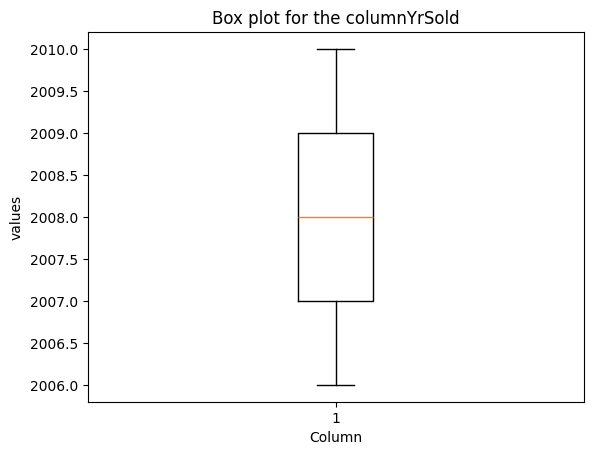

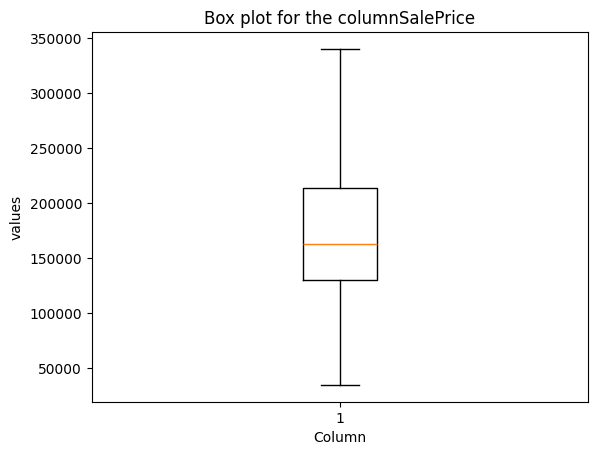

In [40]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Box plot for the column{col}")
    plt.xlabel('Column')
    plt.ylabel('values')
    plt.show()

## Encoding Features 

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

#select the categorical columns 
df_catego_col=df.select_dtypes(include=['object']).columns
df_catego_col=pd.DataFrame(df_catego_col,columns=['string columns'])

for col in df_catego_col.values:
    df[col]=encoder.fit_transform(col)



In [42]:
test_catego_col=test.select_dtypes(include=['object']).columns
test_catego_col=pd.DataFrame(test_catego_col,columns=['string columns'])

for col in test_catego_col.values:
    test[col]=encoder.fit_transform(col)

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   LotShape       1459 non-null   int32  
 6   LotConfig      1459 non-null   int32  
 7   Neighborhood   1459 non-null   int32  
 8   BldgType       1459 non-null   int32  
 9   HouseStyle     1459 non-null   int32  
 10  OverallQual    1459 non-null   int64  
 11  OverallCond    1459 non-null   int64  
 12  YearBuilt      1459 non-null   int64  
 13  YearRemodAdd   1459 non-null   int64  
 14  RoofStyle      1459 non-null   int32  
 15  Exterior1st    1459 non-null   int32  
 16  Exterior2nd    1459 non-null   int32  
 17  ExterQual      1459 non-null   int32  
 18  Foundati

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   LotShape       1460 non-null   int32  
 6   LotConfig      1460 non-null   int32  
 7   Neighborhood   1460 non-null   int32  
 8   BldgType       1460 non-null   int32  
 9   HouseStyle     1460 non-null   int32  
 10  OverallQual    1460 non-null   float64
 11  OverallCond    1460 non-null   float64
 12  YearBuilt      1460 non-null   float64
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   int32  
 15  Exterior1st    1460 non-null   int32  
 16  Exterior2nd    1460 non-null   int32  
 17  ExterQual      1460 non-null   int32  
 18  Foundati

In [45]:
test_copy=test.copy()
y_test=pd.read_csv('sample_submission.csv')
y_test.drop('Id',axis=1,inplace=True)

In [46]:
final_test=pd.concat([test_copy,y_test],axis=1)
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   LotShape       1459 non-null   int32  
 6   LotConfig      1459 non-null   int32  
 7   Neighborhood   1459 non-null   int32  
 8   BldgType       1459 non-null   int32  
 9   HouseStyle     1459 non-null   int32  
 10  OverallQual    1459 non-null   int64  
 11  OverallCond    1459 non-null   int64  
 12  YearBuilt      1459 non-null   int64  
 13  YearRemodAdd   1459 non-null   int64  
 14  RoofStyle      1459 non-null   int32  
 15  Exterior1st    1459 non-null   int32  
 16  Exterior2nd    1459 non-null   int32  
 17  ExterQual      1459 non-null   int32  
 18  Foundati

Concatenate the train and test dataframes to be the final big data

In [47]:
df.reset_index(drop=True,inplace=True)

In [48]:
df_copy=df.copy()
bigdata=pd.concat([df_copy,final_test],ignore_index=True)
bigdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,KitchenQual,Fireplaces,GarageType,GarageFinish,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,1,60.0,0,65.0,8450.0,0,0,0,0,0,...,0,0.0,0,0,0.0,61.0,2,2008,0,208500.000000
1,2,20.0,0,80.0,9600.0,0,0,0,0,0,...,0,1.0,0,0,298.0,0.0,5,2007,0,181500.000000
2,3,60.0,0,68.0,11250.0,0,0,0,0,0,...,0,1.0,0,0,0.0,42.0,9,2008,0,223500.000000
3,4,70.0,0,60.0,9550.0,0,0,0,0,0,...,0,1.0,0,0,0.0,35.0,2,2006,0,140000.000000
4,5,60.0,0,84.0,14260.0,0,0,0,0,0,...,0,1.0,0,0,192.0,84.0,12,2008,0,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160.0,0,21.0,1936.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,6,2006,0,167081.220949
2915,2916,160.0,0,21.0,1894.0,0,0,0,0,0,...,0,0.0,0,0,0.0,24.0,4,2006,0,164788.778231
2916,2917,20.0,0,160.0,20000.0,0,0,0,0,0,...,0,1.0,0,0,474.0,0.0,9,2006,0,219222.423400
2917,2918,85.0,0,62.0,10441.0,0,0,0,0,0,...,0,0.0,0,0,80.0,32.0,7,2006,0,184924.279659


In [49]:
bigdata.drop(['Id'],axis=1,inplace=True)

In [45]:
bigdata

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,KitchenQual,Fireplaces,GarageType,GarageFinish,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,60.0,0,65.0,8450.0,0,0,0,0,0,7.0,...,0,0.0,0,0,0.0,61.0,2,2008,0,208500.000000
1,20.0,0,80.0,9600.0,0,0,0,0,0,6.0,...,0,1.0,0,0,298.0,0.0,5,2007,0,181500.000000
2,60.0,0,68.0,11250.0,0,0,0,0,0,7.0,...,0,1.0,0,0,0.0,42.0,9,2008,0,223500.000000
3,70.0,0,60.0,9550.0,0,0,0,0,0,7.0,...,0,1.0,0,0,0.0,35.0,2,2006,0,140000.000000
4,60.0,0,84.0,14260.0,0,0,0,0,0,8.0,...,0,1.0,0,0,192.0,84.0,12,2008,0,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160.0,0,21.0,1936.0,0,0,0,0,0,4.0,...,0,0.0,0,0,0.0,0.0,6,2006,0,167081.220949
2915,160.0,0,21.0,1894.0,0,0,0,0,0,4.0,...,0,0.0,0,0,0.0,24.0,4,2006,0,164788.778231
2916,20.0,0,160.0,20000.0,0,0,0,0,0,5.0,...,0,1.0,0,0,474.0,0.0,9,2006,0,219222.423400
2917,85.0,0,62.0,10441.0,0,0,0,0,0,5.0,...,0,0.0,0,0,80.0,32.0,7,2006,0,184924.279659


In [50]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   float64
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   LotShape       2919 non-null   int32  
 5   LotConfig      2919 non-null   int32  
 6   Neighborhood   2919 non-null   int32  
 7   BldgType       2919 non-null   int32  
 8   HouseStyle     2919 non-null   int32  
 9   OverallQual    2919 non-null   float64
 10  OverallCond    2919 non-null   float64
 11  YearBuilt      2919 non-null   float64
 12  YearRemodAdd   2919 non-null   int64  
 13  RoofStyle      2919 non-null   int32  
 14  Exterior1st    2919 non-null   int32  
 15  Exterior2nd    2919 non-null   int32  
 16  ExterQual      2919 non-null   int32  
 17  Foundation     2919 non-null   int32  
 18  BsmtQual

Modeling

In [52]:
# split the data
x = bigdata.iloc[:,:-1].values
y = bigdata.iloc[:,-1:].values
X_train,x_test,y_train,y_test=train_test_split( x, y,test_size=0.2,shuffle=True,random_state=42)


array([[ 160.,    0.,   24., ...,    7., 2006.,    0.],
       [  20.,    0.,   75., ...,    6., 2009.,    0.],
       [  60.,    0.,   80., ...,    6., 2010.,    0.],
       ...,
       [  50.,    0.,   65., ...,   12., 2009.,    0.],
       [  20.,    0.,   60., ...,    4., 2006.,    0.],
       [  50.,    0.,   55., ...,    6., 2007.,    0.]])

In [53]:
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((2335, 36), (584, 36), (2335, 1), (584, 1))

scaling  the data

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(x_test)


In [56]:
  #building the neural network
model=Sequential([
    Dense(units=16,input_shape=(36,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='linear')
])

In [57]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                592       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.fit(X_train_scaled,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
59/59 [==============================] - 0s 5ms/step - loss: 3534341376.0000 - val_loss: 3461323520.0000
Epoch 2/10
59/59 [==============================] - 0s 4ms/step - loss: 3228304128.0000 - val_loss: 3159706368.0000
Epoch 3/10
59/59 [==============================] - 0s 5ms/step - loss: 2955875072.0000 - val_loss: 2896213760.0000
Epoch 4/10
59/59 [==============================] - 0s 7ms/step - loss: 2718265600.0000 - val_loss: 2664764928.0000
Epoch 5/10
59/59 [==============================] - 0s 5ms/step - loss: 2511651328.0000 - val_loss: 2460177920.0000
Epoch 6/10
59/59 [==============================] - 0s 6ms/step - loss: 2334030848.0000 - val_loss: 2286722816.0000
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 2182348032.0000 - val_loss: 2137805184.0000
Epoch 8/10
59/59 [==============================] - 0s 3ms/step - loss: 2053170560.0000 - val_loss: 2008837632.0000
Epoch 9/10
59/59 [==============================] - 0s 7ms/step - loss: 

In [72]:
mse = model.evaluate(x_test_scaled, y_test)
print(f"Mean Squared Error on the test set: {mse}")

19/19 [==============================] - 0s 2ms/step - loss: 1651814400.0000
Mean Squared Error on the test set: 1651814400.0


In [73]:
y_train_hat=model.predict(X_train_scaled)


73/73 [==============================] - 0s 2ms/step


In [74]:
# Predict the values for X_test
y_test_hat = model.predict(x_test_scaled)


19/19 [==============================] - 0s 2ms/step


In [75]:
r2_score(y_train, y_train_hat)

0.21850182344946945

In [76]:
r2_score(y_test, y_test_hat)

0.37905968975327964